In [26]:
import numpy as np #MAKES NECESSARY IMPORTS
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") #REMOVES ANNOYING WARNINGS

In [4]:
pd.set_option('display.max_columns', None) #VIEW ALL COLUMNS BECAUSE SOME ARE HIDDEN BY DEFAULT

In [244]:
df = pd.read_csv("energydata_complete.csv") #LOADS DATA

In [245]:
df.head() #VIEW 1ST 5 ROWS JUST TO SEE HOW FAR..

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [246]:
df2 = df.drop(["date","lights"],axis=1) # ACCORDING TO THE INSTRUCTIONS IN THE COURSE DETAILS

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler()

In [249]:
y=df2.iloc[:,0]


In [250]:
x_wait=df2.iloc[:,1:]

In [251]:
x=scaler.fit_transform(x_wait)

In [252]:
x_stat = pd.DataFrame(x,columns=x_wait.columns)

FOR LINEAR REGRESSSION, SKLEARN AND STATSMODELS WERE USED

In [253]:
import statsmodels.api as sm #STATSMODELS IS A TOOL FOR CARRYING OUT LINEAR REG JUST LIKE Sklearn's Linear regression..this shows a detailed table
from statsmodels.api import OLS

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
x_train,x_test,y_train,y_test = train_test_split(x_stat,y,test_size = 0.3, random_state = 42)#SPLITS DATA INTO TRAINING AND TEST

In [256]:
x_train2 = sm.add_constant(x_train)

In [257]:
result1 = sm.OLS(y_train.values.reshape(-1,1),x_train2).fit()

In [258]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     93.32
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        07:47:58   Log-Likelihood:                -82540.
No. Observations:               13814   AIC:                         1.651e+05
Df Residuals:                   13788   BIC:                         1.653e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         173.6062     26.303      6.600      0.000     122.049     225.163
T1             -3.5107     21.322     -0.165      0.869     -45.304      38.283
RH_1          592.2949     29.893     19.814      0.000     533.700     650.889
T2           -252.7104     27.335     -9.245      0.000    -306.291    -199.130
RH_2         -488.6668     33.227    -14.707      0.000    -553.796    -423.538
T3            310.9710     15.481     20.088      0.000     280.627     341.315
RH_3          102.7717     17.617      5.834      0.000      68.239     137.304
T4             31.0097     13.274      2.336      0.019       4.991      57.029
RH_4           28.2328     17.843      1.582      0.114      -6.742      63.208
T5            -16.7528     14.873     -1.126      0.260     -45.905      12.399
RH_5           17.1262      6.997      2.448      0.014       3.412      30.841
T6            252.9747     26.586      9.515      0.000     200.863     305.087
RH_6           40.7121      8.116      5.016      0.000      24.803      56.621
T7             11.0411     16.935      0.652      0.514     -22.153      44.235
RH_7          -47.7366     14.643     -3.260      0.001     -76.439     -19.034
T8            109.1347     12.892      8.465      0.000      83.864     134.405
RH_8         -168.6272     13.037    -12.935      0.000    -194.181    -143.073
T9           -203.2366     20.216    -10.053      0.000    -242.862    -163.611
RH_9          -42.5863     11.966     -3.559      0.000     -66.042     -19.131
T_out        -344.3898     57.918     -5.946      0.000    -457.917    -230.862
Press_mm_hg     7.3181      5.626      1.301      0.193      -3.710      18.346
RH_out        -83.1076     29.163     -2.850      0.004    -140.271     -25.944
Windspeed      31.2259      5.873      5.317      0.000      19.714      42.738
Visibility     13.1681      4.533      2.905      0.004       4.282      22.054
Tdewpoint     126.0008     39.947      3.154      0.002      47.699     204.302
rv1             0.8240      1.398      0.589      0.556      -1.917       3.565
rv2             0.8240      1.398      0.589      0.556      -1.917       3.565
==============================================================================
Omnibus:                     9901.867   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154402.632
Skew:                           3.367   Prob(JB):                         0.00
Kurtosis:                      17.930   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.33e-28. This might indicate that there are
strong multicollinearity problems

USING SKLEARN

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
linear_regressor = LinearRegression()

In [261]:
linear_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
linear_regressor.score(x_train,y_train)

0.14471942405923233

In [263]:
linear_regressor.score(x_test,y_test)

0.1489237020676284

In [264]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [265]:
y_pred = linear_regressor.predict(x_test)

In [266]:
mae = mean_absolute_error(y_test,y_pred)#MAE
mae

53.63951703614332

In [267]:
rss = np.sum(np.square(y_test-y_pred))#RSS
rss

51917205.60216618

In [268]:
score = r2_score(y_test,y_pred)#R2SCORE
score

0.1489237020676284

In [269]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))#RMSE
rmse

93.6392925483868

In [270]:
from sklearn.linear_model import Lasso #LASSO

In [271]:
lasso_reg = Lasso(alpha=0.001)

In [272]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [273]:
lasso_reg.score(x_test,y_test)

0.14889857033860565

In [274]:
from sklearn.linear_model import Ridge #RIDGE

In [275]:
ridge_reg = Ridge(alpha =0.5)

In [276]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [277]:
ridge_reg.score(x_test,y_test)

0.14838234823312757

# DIRECT WORKINGS FOR THE TEST

In [278]:
#QUESTION 12

In [279]:
lin_reg2 = LinearRegression() #new linear regression object

In [280]:
x1 = df["T2"].values.reshape(-1,1) #reshape into a fitting array

In [281]:
y1=df["T6"].values.reshape(-1,1)

In [282]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [283]:
lin_reg2.fit(x_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [284]:
y_pred2 = lin_reg2.predict(x_test2)

In [285]:
score2 = r2_score(y_test2,y_pred2)
np.round(score2,2)

0.64

In [286]:
#QUESTION 13

In [287]:
np.round(mean_absolute_error(y_test2,y_pred2),2) #MEAN ABSOLUTE ERROR

2.82

In [288]:
#QUESTION 14

In [289]:
np.round(np.sum(np.square(y_test2-y_pred2)),2) #RESIDUAL SUM OF SQUARES

78033.97

In [290]:
#QUESTION 15

In [291]:
np.round(np.sqrt(mean_squared_error(y_test2,y_pred2)),3) #ROOT MEAN SQUARED ERROR FOR RELATIONSHIP BETWEEN T2 AND T6

3.63

In [292]:
#QUESTION 16

In [293]:
score2 = r2_score(y_test2,y_pred2) #COEFFICIENT OF DETERMINATION
np.round(score2,2)

0.64

In [294]:
#QUESTION 17

Based on the coefficient column in the table derived above from using statsmodels in cell 142 above, the features with the lowest and highest weights are rv (0.824) and RH1 (592.2949)

In [295]:
#QUESTION 18

In [296]:
ridge_reg2 = Ridge(alpha =0.4)

In [297]:
ridge_reg2.fit(x_train2,y_train2)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [298]:
y_pred3 = ridge_reg2.predict(x_test2)

In [299]:
np.sqrt(mean_squared_error(y_test2,y_pred3))

3.630315114753088

There is no significant change in the RMSE value derived with ridge compared to that derived with simple linear regression in Question 15 (Cell 170) above

In [300]:
#QUESTION 19

In [301]:
lasso_reg2 = Lasso(alpha = 0.001)

In [302]:
lasso_reg2.fit(x_train,y_train) #Training the multiple linear regression with LASSO

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [303]:
lasso_reg2.coef_

array([-4.14712394e+00,  5.90599827e+02, -2.49468798e+02, -4.84565333e+02,
        3.10210384e+02,  1.02204611e+02,  3.03451975e+01,  2.74459046e+01,
       -1.71187233e+01,  1.71033212e+01,  2.50080979e+02,  4.00928832e+01,
        1.03468087e+01, -4.73890941e+01,  1.08883423e+02, -1.68695476e+02,
       -2.02502545e+02, -4.24551004e+01, -3.32571693e+02,  7.28215443e+00,
       -7.80003852e+01,  3.13895144e+01,  1.30783188e+01,  1.18598030e+02,
        1.63117421e+00,  1.04389238e-15])

All 26 features above are non zero values.

In [304]:
#QUESTION 20

In [305]:
y_pred4 = lasso_reg2.predict(x_test)

In [306]:
np.round(np.sqrt(mean_squared_error(y_test2,y_pred4)),3)

98.898

# FURTHER INVESTIGATION TO IMPROVE R-SQUARED

LET US CHECK FOR NORMALITY AS THAT IS A REQUIREMENT FOR LINEAR REGRESSION. WE CAN DO THIS BY USING A DISTPLOT

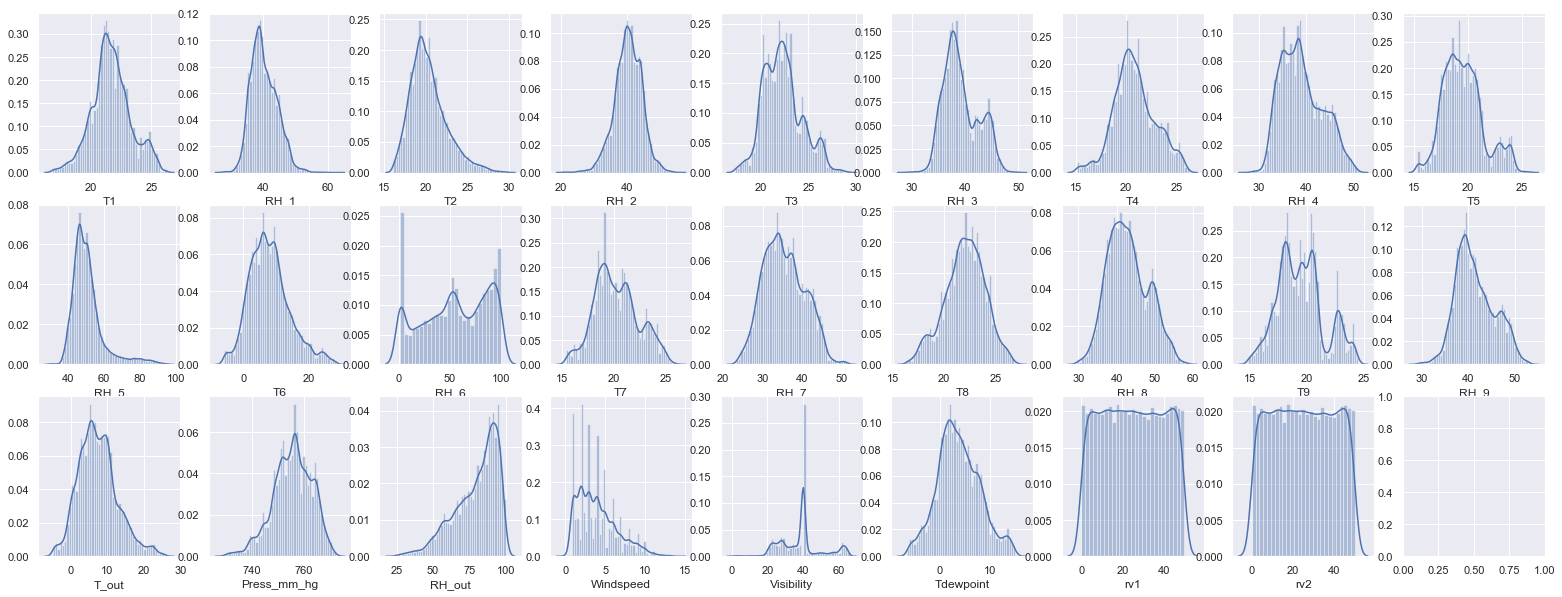

In [307]:
n_rows=3
n_cols=9
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(27, 10) 
for i, column in enumerate(df2.iloc[:,1:].columns):
    sns.distplot(df2[column],ax=axes[i//n_cols,i%n_cols])

FROM THE ABOVE, IT SEEMS LIKE RH_5 HAS A TENDENCY TO BE HIGHLY SKEWED AND LEPTOKURTIC

In [308]:
df2["RH_5"].kurt() #Kurtosis is acceptable between -3 and 3...this value is out of range

4.503390551711675

In [309]:
df2["RH_5"].skew() #Skew is acceptable between -1 and 1...this value is out of range

1.8668200195471256

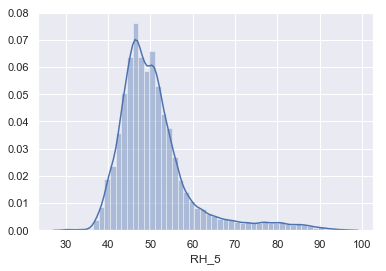

In [310]:
sns.distplot(df2["RH_5"])

WE CAN USE DESCRIBE FUNCTION TO LOCATE THE PERCENTILE THAT CONTAINS OUTLIERS

In [311]:
df2.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.994])["RH_5"]

count    19735.000000
mean        50.949283
std          9.022034
min         29.815000
1%          38.200000
2%          39.285911
3%          39.900000
4%          40.291200
5%          40.790000
6%          41.163333
7%          41.590000
8%          41.933100
9%          42.290000
10%         42.590000
20%         44.626667
30%         46.102667
40%         47.500000
50%         49.090000
60%         50.790000
70%         52.529333
80%         55.000000
90%         60.875333
95%         70.390000
96%         73.897138
97%         77.484633
98%         81.072933
99%         85.589367
99.4%       87.761089
max         96.321667
Name: RH_5, dtype: float64

OKAY..WE'LL BE CUTTING OFF FROM THE 95% MARK WHICH POINTS TO A VALUE OF ABOUT 70..THE DISTPLOT ALSO SHOWS THE RIGHT SKEW BRANCHING OFF AT A VALUE CLOSE TO 70..HOPEFULLY THIS SHOULD AFFECT THE KURTOSIS

In [312]:
df_copy = df2.copy() #TRUE COPY THAT CREATES AN INDEPENDENT COPY AND NOT JUST A REFERENCE TO THE ORIGINAL DATAFRAME

In [313]:
q=df_copy["RH_5"].quantile(0.95) #SETTING THE CUT-OFF MARK AT 95%-ILE

In [314]:
df_copy = df_copy[df_copy["RH_5"] < q] #TAKING ALL INSTANCES BELOW THE 95%-ILE.

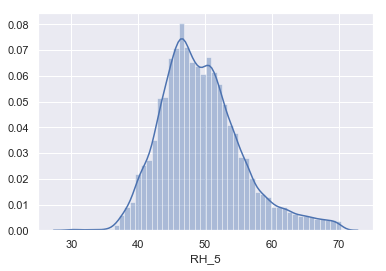

In [315]:
sns.distplot(df_copy["RH_5"])

LOOKS BETTER..

In [316]:
df_copy["RH_5"].kurt()

0.7359133522469996

In [317]:
df_copy["RH_5"].skew()

0.7149977078937431

NOW..BOTH SKEW AND KURTOSIS ARE WITHIN OPTIMAL RANGE OF -1 TO 1 AND -3 TO 3 RESPECTIVELY

LET'S CHECK THE DEPENDENT VARIABLE COLUMN

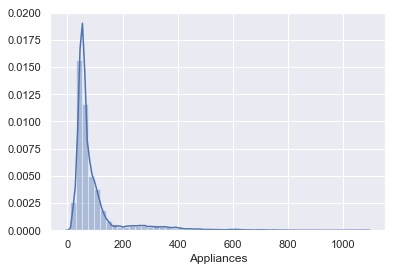

In [318]:
sns.distplot(df_copy["Appliances"])

In [319]:
df_copy["Appliances"].kurt() #LEPTOKURTIC..OUT OF RANGE

14.059778798088663

In [320]:
df_copy["Appliances"].skew() # RIGHT SKEWED...OUT OF RANGE

3.4319796950262207

In [321]:
df_copy.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.994])["Appliances"]

count    18748.000000
mean        96.487625
std        102.337019
min         10.000000
1%          20.000000
2%          30.000000
3%          30.000000
4%          30.000000
5%          30.000000
6%          40.000000
7%          40.000000
8%          40.000000
9%          40.000000
10%         40.000000
20%         50.000000
30%         50.000000
40%         60.000000
50%         60.000000
60%         70.000000
70%         90.000000
80%        110.000000
90%        190.000000
92%        250.000000
93%        270.000000
94%        300.000000
95%        320.000000
96%        360.000000
97%        390.000000
98%        450.000000
99%        580.000000
99.4%      630.000000
max       1080.000000
Name: Appliances, dtype: float64

CUTTING OFF AT SAY..95% WILL STILL YIELD A SKEW...INSTEAD OF CUTTING OFF..LET'S TRY TAKING THE LOG..WE CAN SAVE DATA ROWS THIS WAY

In [322]:
df_copy["log_appliances"] = df_copy["Appliances"].apply(np.log)

In [323]:
df_copy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,log_appliances
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,4.094345
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,4.094345
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,3.912023
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,3.912023
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,4.094345


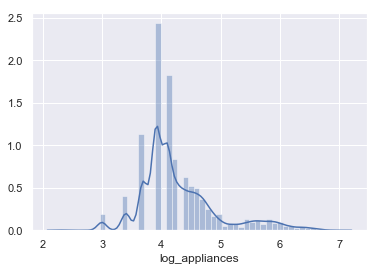

In [324]:
sns.distplot(df_copy["log_appliances"])

THIS LOOKS BETTER..

In [325]:
df_copy["log_appliances"].kurt() #NOW WITHIN RANGE

1.6407484617097428

In [326]:
df_copy["log_appliances"].skew() #NOT WITHIN RANGE..BUT WE'LL WORK WITH THIS

1.2005971466290168

In [327]:
y2=df_copy.iloc[:,-1]
y2.head()

0    4.094345
1    4.094345
2    3.912023
3    3.912023
4    4.094345
Name: log_appliances, dtype: float64

In [328]:
x_prescaled=df_copy.iloc[:,1:-1] #EXCLUDE FIRST AND LAST COLUMNS I.E 'Appliances' and 'log_appliances'

In [329]:
scaler2 = MinMaxScaler() #Create new scaler object

In [330]:
x2=scaler2.fit_transform(x_prescaled) #fit and transform.i.e scale the independent variables

In [331]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x2,y2,test_size = 0.3, random_state = 42)

In [332]:
linear_regressor2 = LinearRegression()

In [333]:
linear_regressor2.fit(x_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's check the score

In [334]:
y_pred_last = linear_regressor2.predict(x_test3)

In [335]:
r2_score(y_test3,y_pred_last)

0.2558230674549321

WE HAVE AN IMPROVED R SQUARED OF 25.58%